# Investigating Explainable AI techniques using Heart Disease dataset

dataset from https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction/data which is based on https://archive.ics.uci.edu/dataset/45/heart+disease 

DOI: https://doi.org/10.24432/C52P4X 







In [1]:
# Import libraries for data analysis and manipulation
import pandas as pd  # Data manipulation and analysis - https://pandas.pydata.org/
import numpy as np   # Numerical computing - https://numpy.org/
import graphviz
import random

# Import libraries for data visualisation
import matplotlib.pyplot as plt  # Data visualisation - https://matplotlib.org/
import seaborn as sns            # Statistical data visualisation - https://seaborn.pydata.org/


# ImportScikit-learn libraries for machine learning tasks
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression   # Logistic Regression model for classification
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay  # Model evaluation metrics
from sklearn.preprocessing import StandardScaler      # Preprocessing - standardising numerical features
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import display, Markdown







In [2]:
# Load the dataset to dataframe df and display the first few rows
df = pd.read_csv('/kaggle/input/heartdiseasepredictiondata/Heart_Disease_Prediction.csv')
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [3]:
# Show basic statistics about the dataset
df.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

In [4]:
# Check dataset for missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
#check column types
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [6]:
# preview data
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

Features glossary for non clinical users

- **Age**: The age of the individual in years.
- **Sex**: The biological sex of the individual ( '1' for male and '0' for female).
- **Chest Pain Type**: variable from less severe to more severe chest pain.
- **BP (Blood Pressure)**: The systolic blood pressure measurement in mmHg.
- **Cholesterol**: The measurement of cholesterol in the blood in mg/dl.
- **FBS over 120 (Fasting Blood Sugar over 120 mg/dl)**: A binary variable indicating if fasting blood sugar is above 120 mg/dl ('1' if true, '0' if false), which is a threshold for potential diabetes.
- **EKG results**: The results of an electrocardiogram test, which measures heart electrical activity and can indicate heart health.
- **Max HR (Maximum Heart Rate)**: The highest heart rate achieved during maximal exercise.
- **Exercise Angina**: A binary variable indicating the presence of chest pain induced by exercise ('1' if present, '0' if absent).
- **ST Depression**: A measurement of depression in the ST segment of an EKG after exercise, indicating abnormal heart activity.
- **Slope of ST**: The slope of the ST segment during an EKG, where different types of slopes can indicate heart health.
- **Number of Vessels Fluro (Number of vessels found by fluoroscopy)**: The number of major blood vessels found to be blocked in the heart by fluoroscopy.
- **Thallium**: A variable from a thallium stress test, which shows how well blood flows to the heart muscle during exercise and rest.



In [7]:
# change the target feature 'Heart Disease' to an int rather than a label - 'Presence' of heart disease as 1 and 'Absence' as 0.  
df['Heart Disease'] = df['Heart Disease'].replace({'Presence': 1, 'Absence': 0}).astype(int)


In [8]:
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0         7              1  
3                        1         7              0  
4                        1         3              0

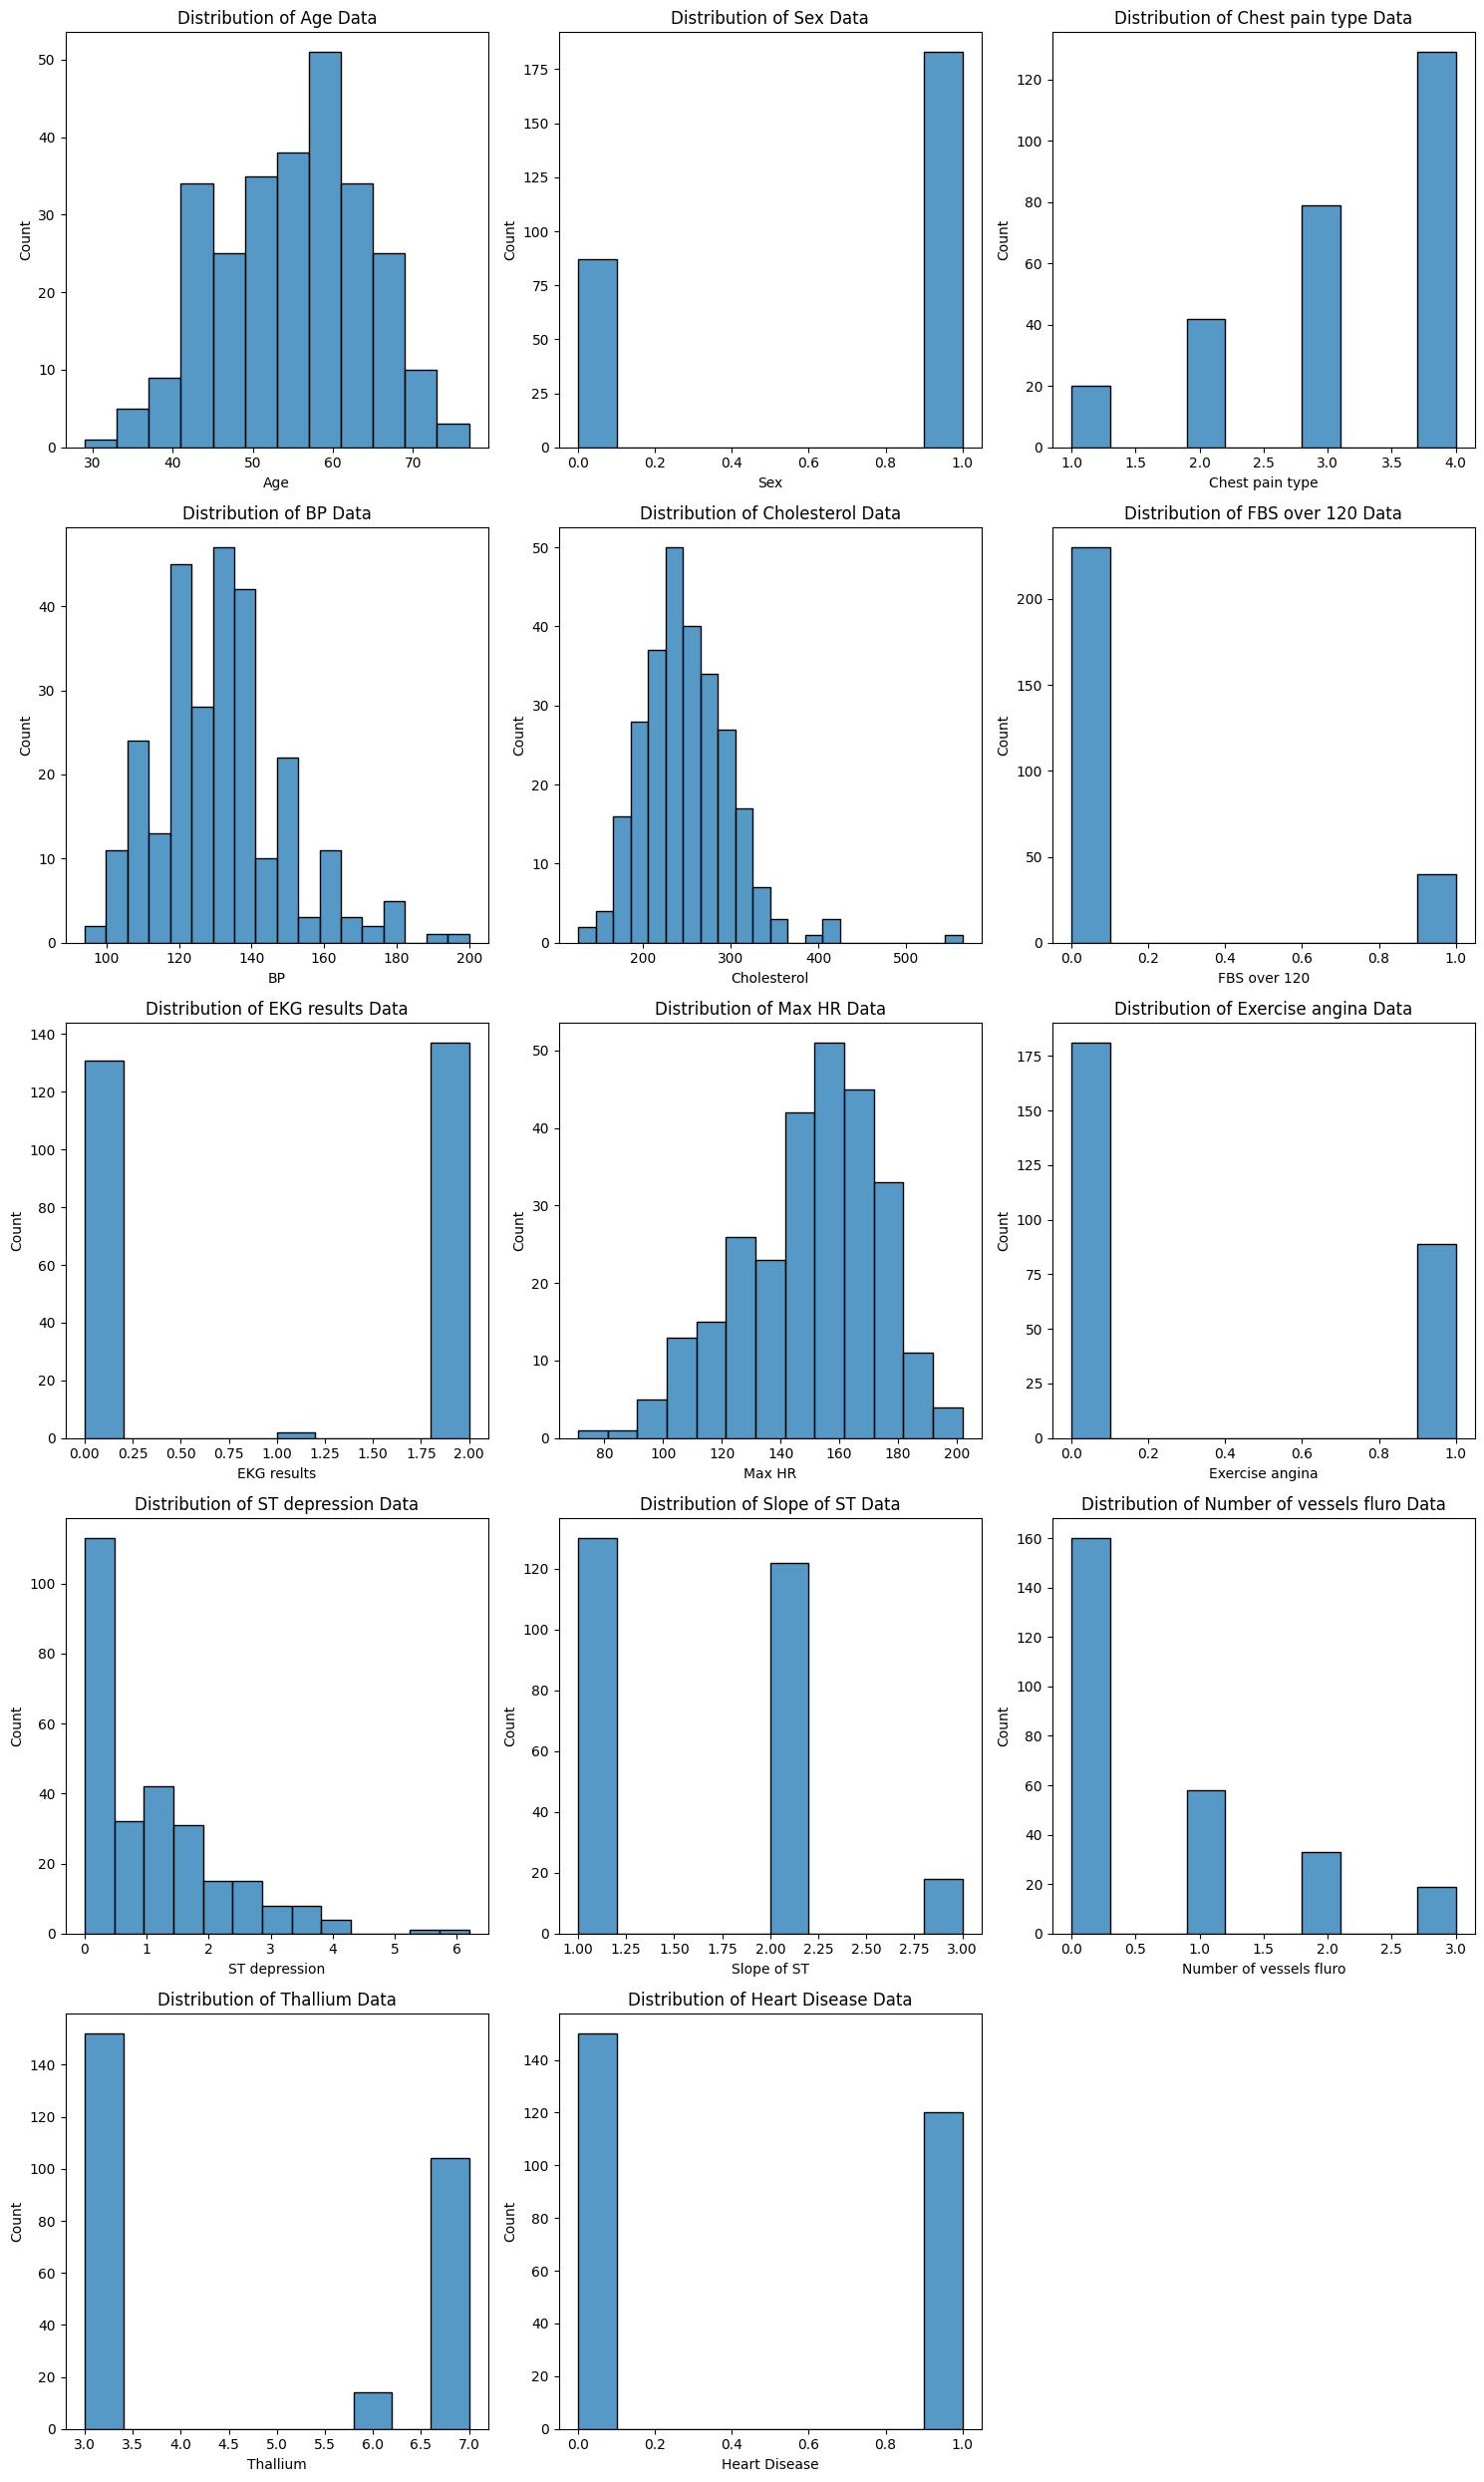

In [9]:
# visualisation of feature dsitributions

num_cols = len(df.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed based on the number of columns

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col])
    plt.tight_layout()

plt.show()


<Axes: >

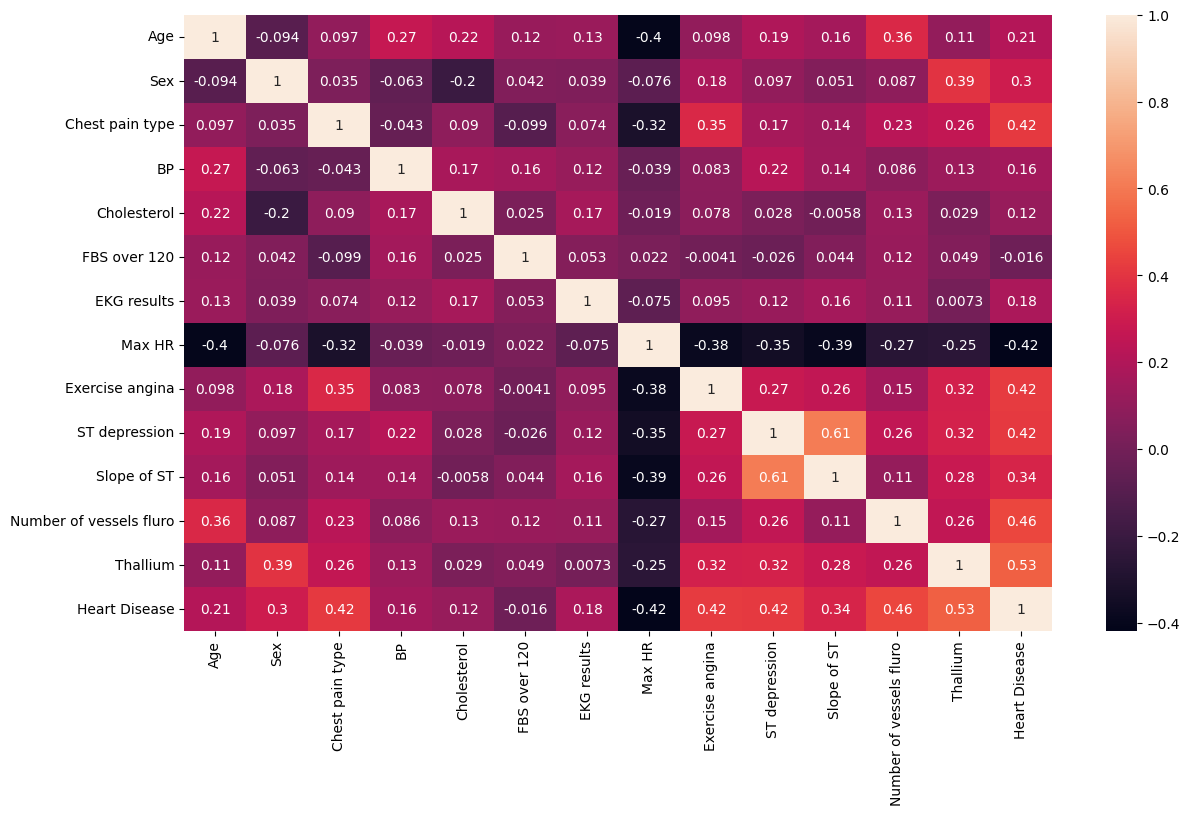

In [10]:
# Correlation matrix
plt.figure(figsize=(14,8)) 
sns.heatmap(df. corr(), annot=True)

# Analysis of correlation using a large language model (chatGPT)
---------------------------------
# UNVERIFIED: Use with caution as conclusions may be incorrect

**Age (0.21):** A positive correlation, indicating older individuals are more likely to have heart disease, which aligns with medical understanding that risk increases with age.

**Sex (0.3):** A moderate positive correlation suggests that the variable coded as '1' (usually male in medical datasets) is more likely to be associated with heart disease.

**Chest pain type (0.42):** This shows a moderate positive correlation, suggesting that as the chest pain type number increases (usually indicating more severe types of pain), the likelihood of heart disease increases.

**BP (Blood Pressure) (0.16):** A lower positive correlation, which may indicate some relationship between higher blood pressure and heart disease.

**Cholesterol (0.12):** Shows a positive but weak correlation with heart disease, which is surprising given the known impact of cholesterol on heart health, but it might be due to the presence of both 'good' and 'bad' cholesterol levels which are not differentiated in this data.

**FBS over 120 (-0.016)** (Fasting Blood Sugar over 120 mg/dl) : There's almost no correlation, suggesting that FBS over 120 by itself may not be a strong indicator of heart disease in this dataset.

**EKG results (0.18):** A low positive correlation, indicating a weak association between EKG results and heart disease.

**Max HR (Maximum Heart Rate) (-0.42):** A moderate negative correlation, suggesting that individuals with higher maximum heart rates during exercise are less likely to have heart disease. This could be indicative of better cardiovascular fitness.

**Exercise angina (0.46):** A strong positive correlation. Exercise-induced angina is strongly associated with heart disease, indicating chest pain during exercise is a significant predictor.

**ST depression (0.42):** A moderate positive correlation. This is an EKG change that can indicate coronary artery disease and is a strong predictor of heart disease.

**Slope of ST (0.34):** A moderate positive correlation. The slope of the ST segment on an EKG is related to heart disease, with certain types of slopes indicating higher risk.

**Number of vessels fluro (Number of vessels found by fluoroscopy) (0.46):** This has a strong positive correlation with heart disease, suggesting that the more vessels that are visible during fluoroscopy, the higher the risk of heart disease.

**Thallium (0.53):** This shows the strongest positive correlation with heart disease among all the features. The thallium stress test is a nuclear imaging test that shows how well blood flows into the heart while exercising or at rest, and different levels can indicate areas of the heart that receive less blood flow, typically associated with heart disease.

# Preparing Training and Test Data
-----------------------------------------------------------

In [11]:
#split the data in to training and testing datasets

# Prepare the features (X) and target (y)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Split the data into training and testing sets
# 80% of the data for training and 20% for testing.  fixed random state for reproducibility (42 because H2G2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The shapes of the resulting datasets will tell us how many samples we have for training and testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((216, 13), (54, 13), (216,), (54,))

In [12]:
# Define a function 'report' to evaluate and display model performance metrics
def report(actual, pred):
    # Calculate and print the accuracy score to assess overall model performance
    acc_score = accuracy_score(actual, pred)
    print("Accuracy of model is", round((acc_score * 100), 2), '%')

    # Generate a confusion matrix to visualize true vs. predicted classifications
    con_mat = confusion_matrix(actual, pred)
    print('\nConfusion Matrix:')
    print(con_mat)

    # Create a detailed classification report to show precision, recall, and F1-score for each class
    class_rep = classification_report(actual, pred)
    print('\nClassification Report:')
    print(class_rep)

    # Plot and display the confusion matrix for a more intuitive understanding of model performance
    ConfusionMatrixDisplay.from_predictions(actual, pred)
    plt.title('Confusion Matrix')
    plt.show()





# Logistic regression model
------------------------------------------------------------

Accuracy of model is 84.26 %

Confusion Matrix:
[[103  14]
 [ 20  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       117
           1       0.85      0.80      0.82        99

    accuracy                           0.84       216
   macro avg       0.84      0.84      0.84       216
weighted avg       0.84      0.84      0.84       216



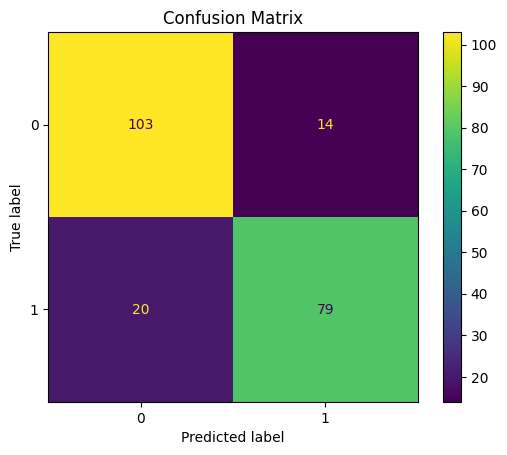

Accuracy of model is 92.59 %

Confusion Matrix:
[[32  1]
 [ 3 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



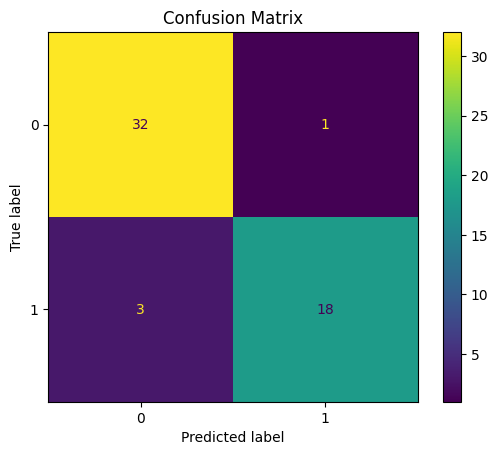

In [13]:
# Initialize the LogisticRegression model with a specified maximum number of iterations
log = LogisticRegression(max_iter=1000)
# Fit the logistic regression model to the training data
log.fit(X_train, y_train)
# Predict the target variable for the training data
train_log = log.predict(X_train)
# Predict the target variable for the test data
test_log = log.predict(X_test)
# Evaluate the model's performance on the training data using the 'report' function
report(y_train, train_log)
# Evaluate the model's performance on the test data using the 'report' function
report(y_test, test_log)




Our model is correct 84% of the time for the training data and 93% correct for test data

The confusion matrix shows where the model's predictions land:

training set confusion matrix:
* 103 true negatives: The number of instances correctly predicted as class 0 (False - Heart Disease)
* 79 true positives: The number of instances correctly predicted as class 1 (True - heart Disease)

test set confusion matrix:
* 32 true negatives: The number of instances correctly predicted as class 0
* 18 true positives: The number of instances correctly predicted as class 1

report values:

* **Precision** tells us how reliable the model's predictions are
* **Recall** tells us how well the model can find all the positive cases
* **F1-score** combines to give a balanced view of the model's performance




# Decision Tree and Stratified K-Fold Cross-Validation
--------------------------------------------

Using Decision Tree Classifier in conjunction with Stratified K-Fold cross-validation benefits:

* Decision Trees handle non-linear data effectively.
* Shows how feature decisions are made.
* Stratified K-Fold ensures even class distribution across each fold, useful for imbalanced datasets
* validates model performance across different subsets  - reliable performance estimate.








In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold


# Assuming 'df' is your DataFrame and 'Heart Disease' is the column you're predicting
feature_col_tree = df.drop('Heart Disease', axis=1).columns.tolist()

# Initialize list to store the ROC AUC scores for each fold
acc_Dtree = []

# Create a StratifiedKFold object to ensure each fold is a good representative of the whole
kf = StratifiedKFold(n_splits=5)

# Enumerate over each fold produced by the StratifiedKFold object
for fold, (trn_, val_) in enumerate(kf.split(X=df[feature_col_tree], y=df['Heart Disease'])):
    # Extract the training data for the current fold
    X_train = df.loc[trn_, feature_col_tree]
    y_train = df.loc[trn_, 'Heart Disease']
    
    # Extract the validation data for the current fold
    X_valid = df.loc[val_, feature_col_tree]
    y_valid = df.loc[val_, 'Heart Disease']
    
    # Initialize the DecisionTreeClassifier with entropy to measure the quality of a split
    clf = DecisionTreeClassifier(criterion="entropy")
    
    # Train the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Predict on the validation data
    y_pred = clf.predict(X_valid)
    
    # Print the fold number
    print(f"The fold is : {fold} : ")
    
    # Generate and print a classification report to show main classification metrics
    print(classification_report(y_valid, y_pred))
    
    # Calculate the ROC AUC score and append to the list
    acc = roc_auc_score(y_valid, y_pred)
    acc_Dtree.append(acc)
    
    # Print the ROC AUC score for the current fold
    print(f"The ROC AUC score for fold {fold+1} : {acc}")

# After all folds are evaluated, calculate the average ROC AUC score
average_acc_Dtree = sum(acc_Dtree) / len(acc_Dtree)
print(f"Average ROC AUC Score for Decision Tree: {average_acc_Dtree:.2f}")




The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        30
           1       0.68      0.54      0.60        24

    accuracy                           0.69        54
   macro avg       0.68      0.67      0.67        54
weighted avg       0.69      0.69      0.68        54

The ROC AUC score for fold 1 : 0.6708333333333334
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.74      0.71      0.72        24

    accuracy                           0.76        54
   macro avg       0.76      0.75      0.76        54
weighted avg       0.76      0.76      0.76        54

The ROC AUC score for fold 2 : 0.7541666666666668
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.76      0.67      0.71        24

    accuracy             

In [15]:
# extract column names from dataframe inito a list
feature_col_tree = df.columns.to_list()

# emove 'Heart Disease' from features as it's our target variable
feature_col_tree.remove('Heart Disease')


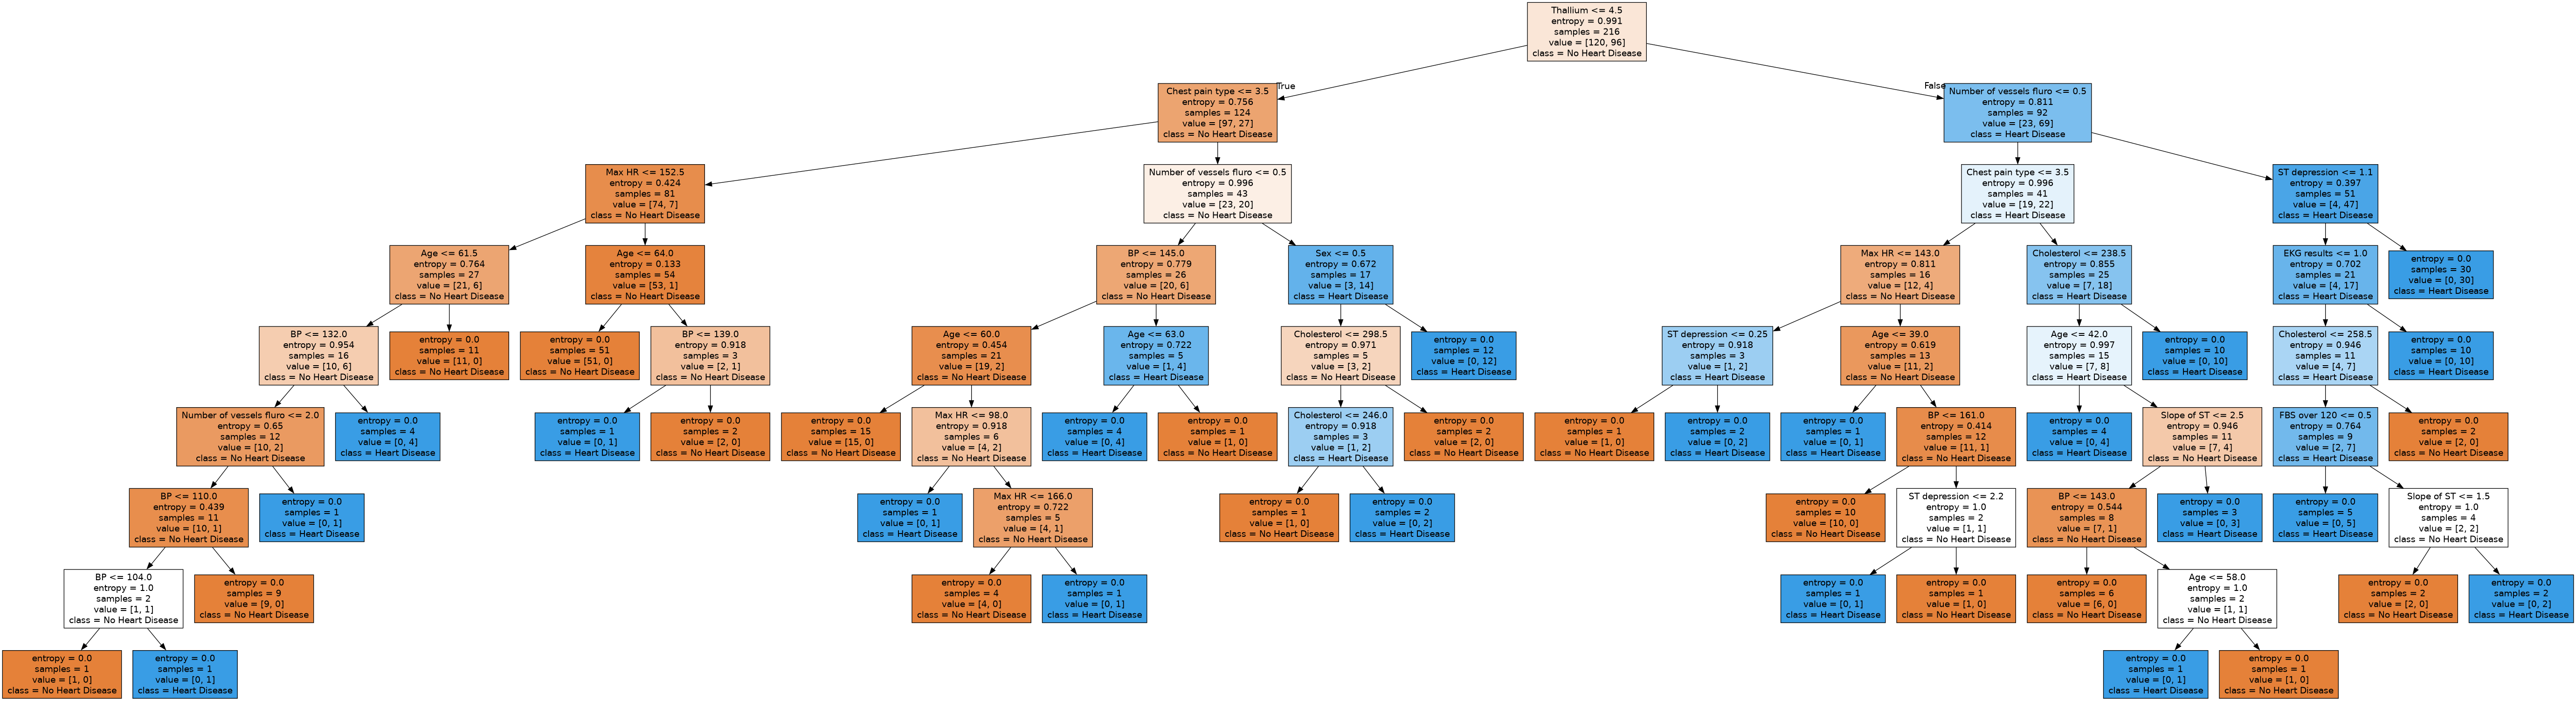

/kaggle/working/Decision_Tree.png

In [16]:
import graphviz
from IPython.display import Image, display, FileLink

# Generate DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=['No Heart Disease', 'Heart Disease'],  # Assuming binary classification
                                filled=True)

# Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data, format="png")

# Save the graph to a PNG file and cleanup the source file
file_path = 'Decision_Tree.png'
graph.render(filename='Decision_Tree', format='png', cleanup=True)

# Display the inline image
display(Image(filename=file_path))

# Provide a clickable link to the image file for full resolution
display(FileLink(file_path, result_html_prefix="Click here to open tree as an image: "))



# Random Forest and Stratified K-Fold Cross-Validation
-----------------------------------
In this section of our project, we venture into the realm of ensemble learning by implementing a Random Forest Classifier. Our objective here is twofold:

Improved Prediction Accuracy: Random Forest, an ensemble of decision trees, often yields superior predictive performance compared to a single decision tree. By aggregating the decisions of multiple trees, it reduces the risk of overfitting and captures more complex patterns in the data.

Stability and Robustness: We employ Stratified K-Fold Cross-Validation to assess the Random Forest model's performance. This method not only provides a more reliable estimate of the model's effectiveness on unseen data but also ensures that each fold of the dataset is representative of the whole, especially crucial for imbalanced datasets.

Our aim is to compare the Random Forest model's performance with the previously used logistic regression and single decision tree models. This comparison will give us insights into the benefits and trade-offs of using more complex ensemble techniques, setting a strong foundation for our subsequent exploration into model interpretability with tools like LIME and SHAP. By understanding the strengths and limitations of these different modeling approaches, we can make more informed decisions about which model to use in practical scenarios, balancing accuracy with interpretability.

In [17]:
kf = StratifiedKFold(n_splits=5)
acc_RForest = []  # List to store accuracy for each fold

for fold, (train_index, test_index) in enumerate(kf.split(X=df[feature_col_tree], y=df['Heart Disease'])):
    X_train, X_test = df.loc[train_index, feature_col_tree], df.loc[test_index, feature_col_tree]
    y_train, y_test = df.loc[train_index, 'Heart Disease'], df.loc[test_index, 'Heart Disease']

    # Initialize the Random Forest Classifier
    rforest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

    # Train the classifier
    rforest.fit(X_train, y_train)

    # Make predictions
    y_pred = rforest.predict(X_test)

    # Print fold number and classification report
    print(f"Fold {fold + 1}:")
    print(classification_report(y_test, y_pred))

    # Calculate and append accuracy
    acc = roc_auc_score(y_test, y_pred)
    acc_RForest.append(acc)
    print(f"ROC AUC Score for fold {fold + 1}: {acc}\n")


Fold 1:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.67      0.67      0.67        24

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.70      0.70      0.70        54

ROC AUC Score for fold 1: 0.7000000000000001

Fold 2:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.78      0.75      0.77        24

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54

ROC AUC Score for fold 2: 0.7916666666666667

Fold 3:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg

In [18]:
average_accuracy = sum(acc_RForest) / len(acc_RForest)
print(f"Average ROC AUC Score for Random Forest: {average_accuracy}")


Average ROC AUC Score for Random Forest: 0.8033333333333335


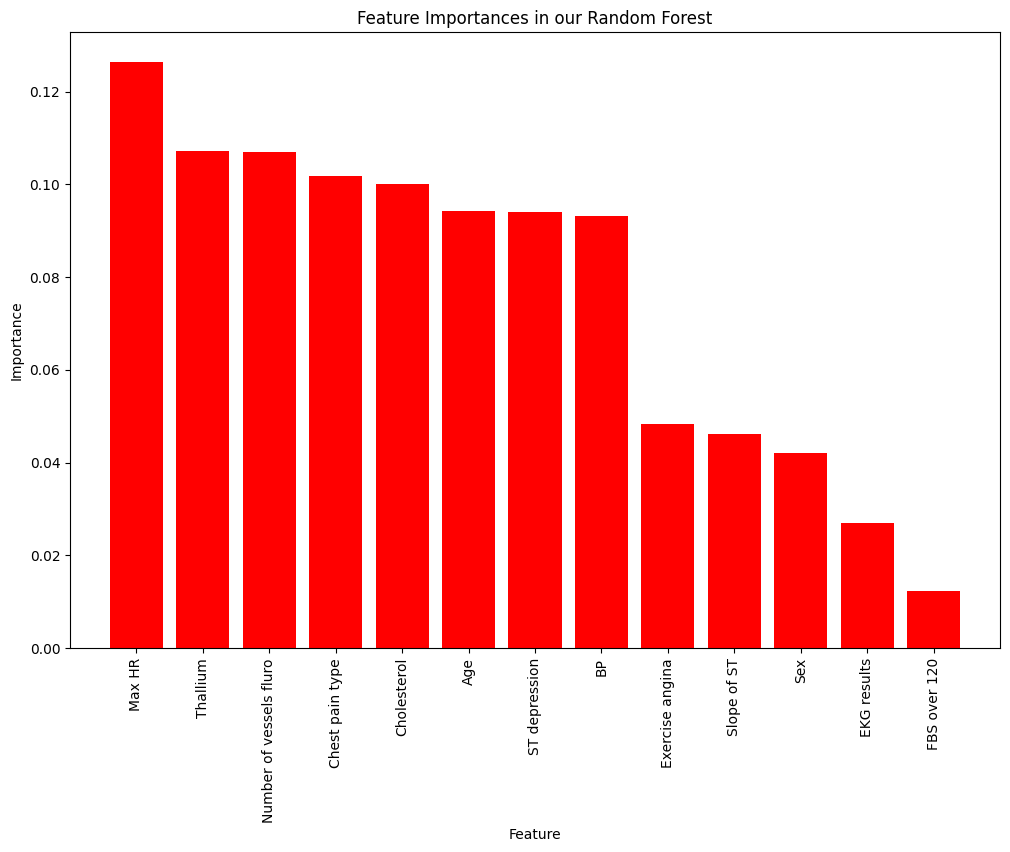

In [19]:

# Assuming 'rforest' is your trained Random Forest model
feature_importances = rforest.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(12, 8))
plt.title("Feature Importances in our Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), [feature_col_tree[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')

# Show the plot
plt.show()


# Using LIME for explainability
----------------------
LIME stands for Local Interpretable Model-agnostic Explanations. It is a method for explaining predictions of Machine Learning models
https://arxiv.org/abs/1602.04938

In [20]:
from lime.lime_tabular import LimeTabularExplainer

# Assume 'df' is the DataFrame and 'X_train' and 'X_test' are DataFrames as well
feature_names = X_train.columns.tolist()  # The order of feature names should match the training data
class_names = ['No Heart Disease', 'Heart Disease']

# Create a LIME Tabular Explainer using the training data (X_train.values)
explainer_log = LimeTabularExplainer(X_train.values, 
                                     feature_names=feature_names, 
                                     class_names=class_names, 
                                     mode='classification')

# Select the instance you want to explain
instance_index = 7  # Adjust the index as needed
instance = X_test.iloc[instance_index].to_frame().transpose()

# Generate the explanation
exp_log = explainer_log.explain_instance(instance.iloc[0].values, 
                                         log.predict_proba, 
                                         num_features=len(feature_names))

# Display it
exp_log.show_in_notebook()




/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


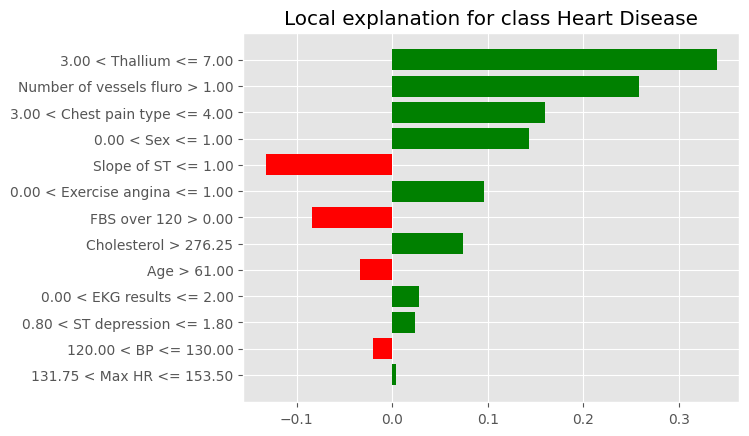

In [21]:
# Assuming 'log' is your trained LogisticRegression model
# 'X_train' and 'X_test' are your feature datasets
# 'feature_names' is the list of feature names used by the model

# When creating the LIME explainer, ensure that 'feature_names' matches the model's features
explainer_log = LimeTabularExplainer(X_train.values, 
                                     feature_names=feature_names, 
                                     class_names=class_names, 
                                     mode='classification')

# When preparing the instance for explanation, ensure that it retains the feature names
instance_index = 7  # example index
instance = X_test.iloc[[instance_index]]

# The LIME explainer should now be able to match the feature names from 'instance' to the model
exp_log = explainer_log.explain_instance(instance.iloc[0].values, 
                                         log.predict_proba, 
                                         num_features=len(feature_names))

# Proceed with the visualization as before
with plt.style.context("ggplot"):
    exp_log_fig = exp_log.as_pyplot_figure()
    exp_log_fig.show()




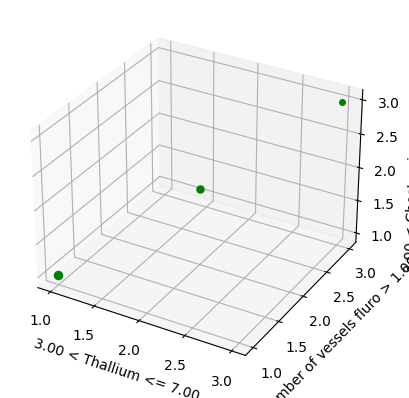

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting the feature names and their weights from the LIME explanation
feature_names = exp_log.as_list()
top_features = sorted(feature_names, key=lambda x: abs(x[1]), reverse=True)[:3]  # Top 3 features

# Creating the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Axes values (for demonstration, using indices 0, 1, and 2)
x_vals = [1, 2, 3]  # Placeholder for actual values of the first top feature
y_vals = [1, 2, 3]  # Placeholder for actual values of the second top feature
z_vals = [1, 2, 3]  # Placeholder for actual values of the third top feature

# Contributions (for demonstration, using the feature weights)
contributions = [top_features[0][1], top_features[1][1], top_features[2][1]]

# Plotting each point with a color corresponding to its contribution weight
for (x, y, z, contrib) in zip(x_vals, y_vals, z_vals, contributions):
    color = 'red' if contrib < 0 else 'green'
    size = abs(contrib) * 100  # Scale the size to make differences visible
    ax.scatter(x, y, z, color=color, s=size)

# Set labels according to the top features
ax.set_xlabel(top_features[0][0])
ax.set_ylabel(top_features[1][0])
ax.set_zlabel(top_features[2][0])

# Show the plot
plt.show()


# Using SHAP - SHapley Additive exPlanations

-------------------------------------------------
SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.  https://shap.readthedocs.io/en/latest/index.html



In [23]:
import shap

# Create a SHAP KernelExplainer using the 'logistic regression model
explainer = shap.KernelExplainer(log.predict_proba, X_test, link="logit")

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)


  0%|          | 0/54 [00:00<?, ?it/s]

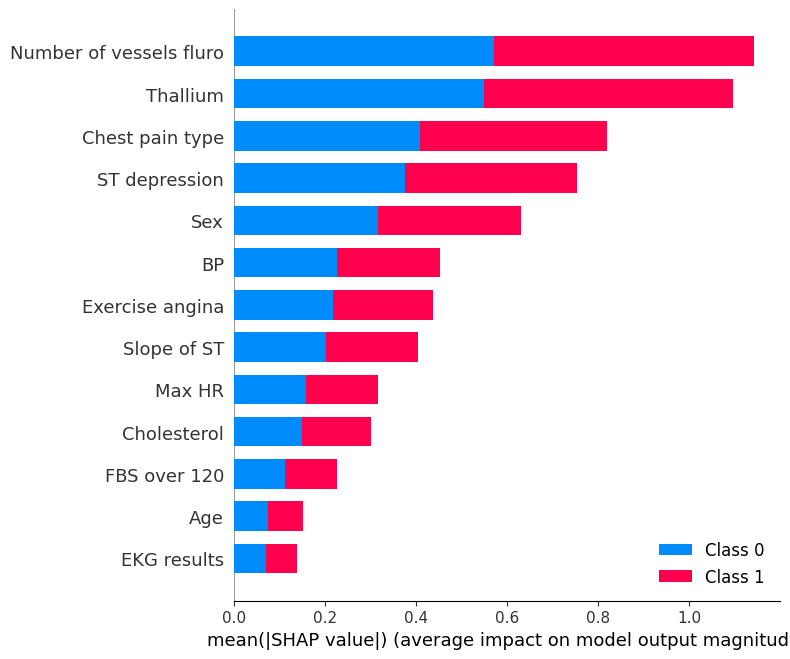

In [24]:
import shap
# Bar plot of global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


Here we use SHAP to quantify the contribution of each feature to the model's predictions. The bar plot displayed above illustrates the global feature importance determined by the average magnitude of SHAP values per feature across the dataset.

Note: 

* Feature Importance: The length of each bar represents the average impact of each feature on the model's output. A longer bar signifies a higher influence on model predictions.* 
* Ranking: Features are ranked by their importance, with 'Number of vessels fluro' at the top, indicating it has the greatest impact on the model's decisions, followed by 'Thallium', 'Chest pain type' etc* 
* Decision Making: This visualization aids us in understanding which features drive the model's decisions the most. For instance, the number of vessels detected by fluoroscopy ('Number of vessels fluro') appears to be the most significant predictor for heart disease presence in the dataset.

By interpreting this plot, we can better understand the model's behavior and trust its predictions and inform development / troubleshooting of the model. 

### SHAP Summary - Training Set

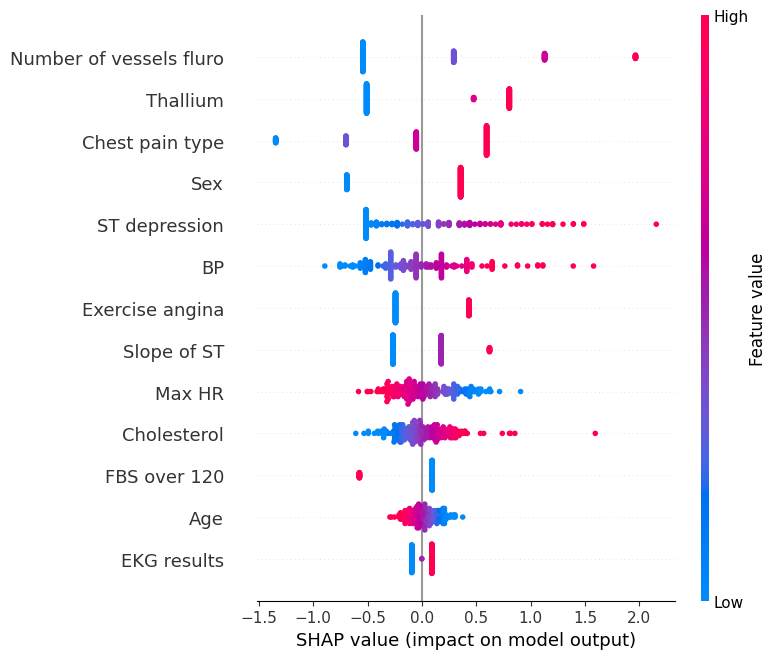

### SHAP Summary - Testing Set

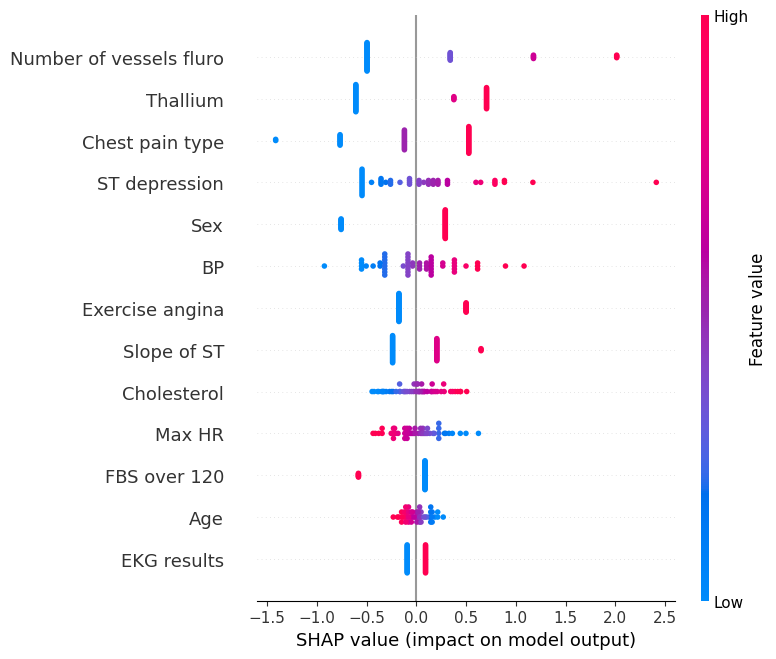

In [25]:
# init JavaScript-based plots
shap.initjs()
#import matplotlib.pyplot as plt


# Assume X_train is the training data, X_test is the testing data, and model is a trained model.
# Let's also assume 'log' is your trained model object.

# Create SHAP explainers and calculate the SHAP values for both sets
explainer_train = shap.Explainer(log, X_train)
shap_values_train = explainer_train.shap_values(X_train)

explainer_test = shap.Explainer(log, X_test)
shap_values_test = explainer_test.shap_values(X_test)

# Plot SHAP summary for the training set
display(Markdown('### SHAP Summary - Training Set'))
plt.figure()
shap.summary_plot(shap_values_train, X_train)



# Plot SHAP summary for the testing set
display(Markdown('### SHAP Summary - Testing Set'))
plt.figure()
shap.summary_plot(shap_values_test, X_test)



**SHAP Summary Plot** - shows the distribution of the impact each feature has on the model output.

* Horizontal Location: Indicates whether the effect of that value is associated with a higher or lower prediction. A SHAP value (impact on model output) to the right suggests a higher likelihood of the positive class (Heart Disease) while a value to the left indicates a lower likelihood (No Heart Disease)* 
* Color Coding: Points are colored by the feature value for the data point (high values in pink, low in blue), providing insight into the correlation of a feature with the prediction outcome.* 
* Vertical Position: Features are stacked in descending order of importance. The 'Number of vessels fluro' at the top has the most significant impact on model output.* 
* Density of Points: A higher concentration of points at a particular SHAP value indicates more data points with that level of impact.


* Number of vessels fluro: Higher numbers of detectable vessels typically contribute to a higher risk prediction for heart disease, as indicated by SHAP values predominantly on the right.* 
* Thallium: The presence of thallium, likely from a stress test result, strongly influences the model's prediction, with higher thallium levels usually indicating a greater risk.* 
* Chest pain type: Certain types of chest pain have a substantial impact on predicting a higher risk, as shown by SHAP values skewed to the right.* 
* Sex: This feature affects the prediction variably, with some values slightly increasing the risk while others decrease it, as evidenced by the spread of SHAP values across both sides.* 
* ST Depression: The extent of ST depression observed in an EKG test contributes to an increased prediction of heart disease when higher values are present.* 
* BP (Blood Pressure): While higher blood pressure readings tend to increase the risk prediction, the impact varies, as shown by the wide distribution of SHAP values.* 
* Exercise Angina: The occurrence of angina induced by exercise generally indicates a higher prediction of risk, suggested by many points falling on the right.* 
* Slope of ST: The slope of the ST segment in an EKG reading influences the prediction, with certain slopes pointing to higher risks.* 
* Cholesterol: Generally, higher cholesterol levels tend to push the model's prediction towards a higher risk of heart disease, as seen by the concentration of points on the right side.* 
* Max HR (Maximum Heart Rate): A lower maximum heart rate during exercise seems to increase the risk prediction, but there's a notable spread in the impact across the dataset.* 
* FBS over 120 (Fasting Blood Sugar): Elevated fasting blood sugar levels have a varied impact on the model's output, suggesting that while it's an important factor, its predictive influence is less consistent.* 
* Age: Older age tends to be associated with a higher risk prediction, but similar to FBS, its impact is spread out, reflecting a diverse effect on the model's predictions.* 
* EKG results: The results from EKG tests appear to have a mixed influence on the model's risk predictions, with a broad spread of SHAP values.

The SHAP summary plots for both the training and testing sets provide a visual representation of the contribution of each feature to the model's predictions. Here are some conclusions that can be drawn from these plots:

1. **Feature Importance**: The plots indicate which features have the most significant impact on model predictions. Features with longer spread and further from the center (SHAP value = 0) in the plots have a more substantial impact. For instance, "Number of vessels fluro" and "Thallium" appear to be highly influential for both datasets.

2. **Consistency Across Datasets**: The relative order and impact of features are largely consistent between the training and testing datasets. This suggests that the model is generalizing well and not overfitting to the training data.

3. **Positive and Negative Impact**: The direction of the dots (left or right from the center) indicates whether the feature's effect is to increase or decrease the likelihood of the positive outcome. For example, higher values of "Thallium" seem to increase the model's output value, which could indicate a higher likelihood of the positive class.

4. **Interaction Effects**: Features that show a high dispersion of SHAP values (dots spread vertically) at similar feature value levels might be interacting with other features. This can be further investigated using SHAP dependence plots.

5. **Predictive Value of Features**: Some features such as "Sex" and "BP" show a mix of positive and negative impacts across different instances, indicating that these features may have complex relationships with the outcome.

6. **Symmetry in Feature Impact**: If the spread of points is symmetric around SHAP value = 0, it suggests that the feature equally influences the prediction in both positive and negative directions depending on the feature value.

7. **Potential Outliers or Extreme Cases**: Outliers in the SHAP values could suggest extreme cases where certain features have an unusually high impact on the prediction. These instances can be further investigated to understand why the model reacts strongly to them.

8. **Model Robustness**: The similarity in the patterns of SHAP values between the training and testing sets can indicate that the model is robust and provides consistent explanations for its predictions, which is a good sign of model reliability.

It's important to note that these plots should be combined with domain knowledge to make more accurate interpretations. For example, the feature "Number of vessels fluro" likely refers to the number of fluoroscopy-marked vessels in a heart disease context, which is a known risk factor and would be expected to have a significant impact on predictions related to heart disease.

# Examine an instance
------------------------
Force Plot example

In [26]:

# init JavaScript-based plots
shap.initjs()

# init SHAP explainer for the Logistic Regression model
masker = shap.maskers.Independent(data=X_train)
explainer = shap.LinearExplainer(log, masker)

# set SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Select the SHAP values for heart disease = 1
# Check if shap_values is a list with one entry per class
if isinstance(shap_values, list):
    shap_values = shap_values[1]  

# what instance do we want to examine
instance_num = 7

# show the shap vaules on a force plot

shap.force_plot(
    explainer.expected_value, 
    shap_values[instance_num], 
    X_test.iloc[instance_num,:]
)


# Compare 5 instances with Decision Plot
------------------------------
the decision plot gives a detailed view of how each feature in a dataset contributes to a specific prediction, allowing us to understand the model's reasoning on a instance level. 

* Feature Contribution: Each line on the plot represents a feature from the dataset. The length and direction of the line indicate the magnitude and direction (positive or negative) of the feature's impact on the model's output.
* Positive and Negative SHAP Values: Features that push the prediction higher (towards the positive class) extend to the right and have positive SHAP values. Features that push the prediction lower extend to the left and have negative SHAP values.
* Cumulative Impact: Starting from a base value (typically the average model output over the dataset), the SHAP values of all features are summed to arrive at the final prediction. This cumulative path is traced by the connecting line, showing the journey from the base value to the model's output.
* Order of Importance: Features are stacked vertically in order of their absolute impact on the specific prediction, with the most impactful feature at the top.





SHAP Decision Plot for instance 40:


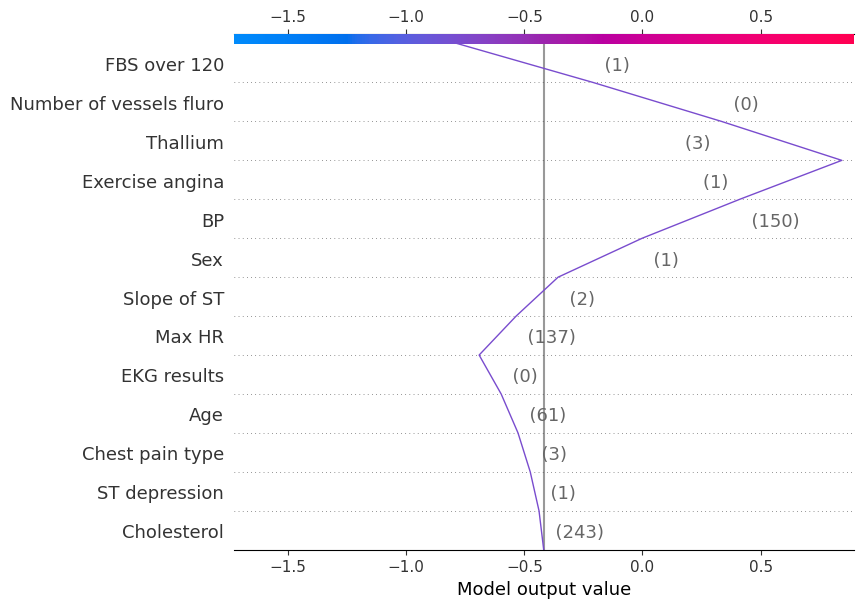


Full details of instance 40 including the predicted probability:
      Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
256  61.0  1.0              3.0  150.0        243.0           1.0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
256          0.0   137.0              1.0            1.0          2.0   

     Number of vessels fluro  Thallium  Predicted Probability  
256                      0.0       3.0               0.313478  

----------------------------------------------------------------------------------------------------


SHAP Decision Plot for instance 7:


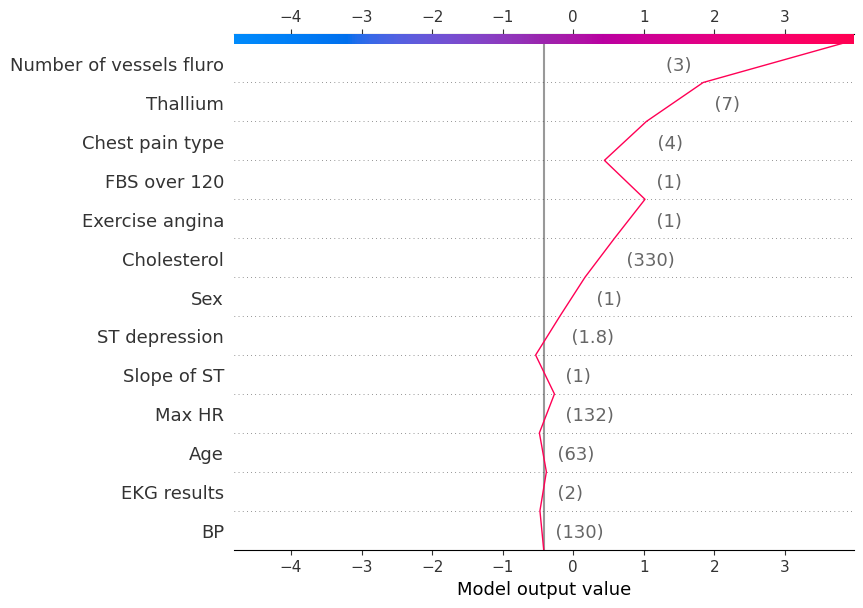


Full details of instance 7 including the predicted probability:
      Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
223  63.0  1.0              4.0  130.0        330.0           1.0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
223          2.0   132.0              1.0            1.8          1.0   

     Number of vessels fluro  Thallium  Predicted Probability  
223                      3.0       7.0                0.97827  

----------------------------------------------------------------------------------------------------


SHAP Decision Plot for instance 1:


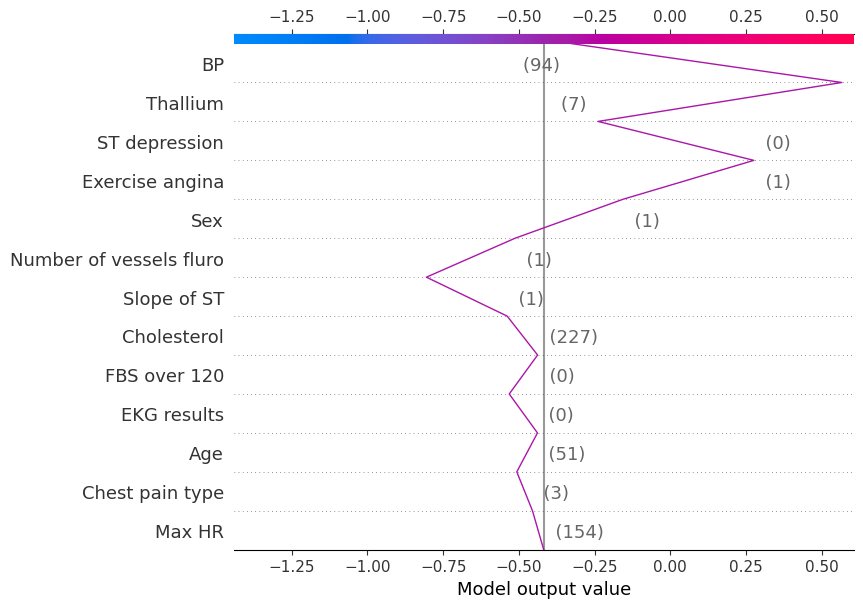


Full details of instance 1 including the predicted probability:
      Age  Sex  Chest pain type    BP  Cholesterol  FBS over 120  EKG results  \
217  51.0  1.0              3.0  94.0        227.0           0.0          0.0   

     Max HR  Exercise angina  ST depression  Slope of ST  \
217   154.0              1.0            0.0          1.0   

     Number of vessels fluro  Thallium  Predicted Probability  
217                      1.0       7.0               0.418807  

----------------------------------------------------------------------------------------------------


SHAP Decision Plot for instance 47:


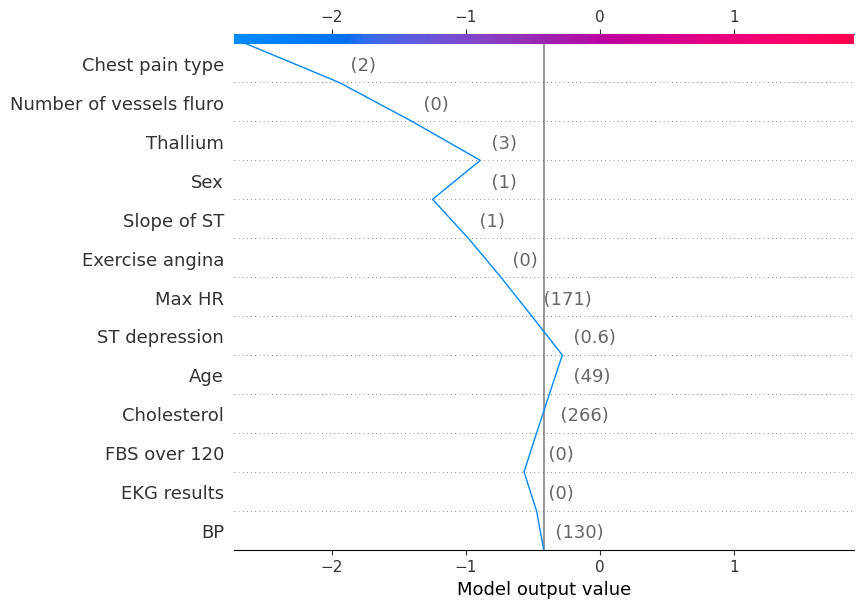


Full details of instance 47 including the predicted probability:
      Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
263  49.0  1.0              2.0  130.0        266.0           0.0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
263          0.0   171.0              0.0            0.6          1.0   

     Number of vessels fluro  Thallium  Predicted Probability  
263                      0.0       3.0                0.06644  

----------------------------------------------------------------------------------------------------


SHAP Decision Plot for instance 17:


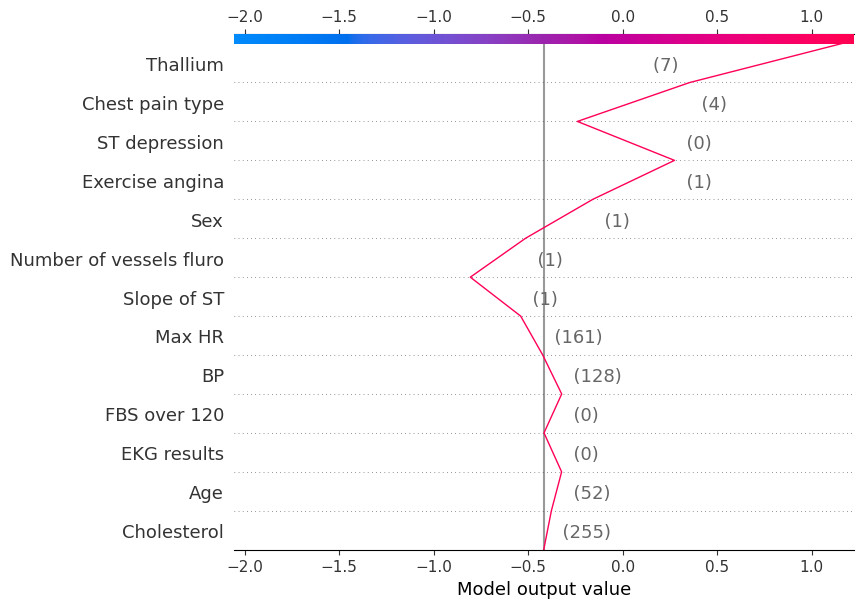


Full details of instance 17 including the predicted probability:
      Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
233  52.0  1.0              4.0  128.0        255.0           0.0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
233          0.0   161.0              1.0            0.0          1.0   

     Number of vessels fluro  Thallium  Predicted Probability  
233                      1.0       7.0               0.761273  

----------------------------------------------------------------------------------------------------



In [27]:

# Set the seed for reproducibility
random.seed(42)

# Randomly select 5 unique instance indices from the test set
random_indices = random.sample(range(X_test.shape[0]), 5)

# Compute SHAP values for the test set if not done already
shap_values = explainer.shap_values(X_test)

# Ensure that SHAP values array is correct for the positive class
shap_values_pos_class = shap_values[1] if isinstance(shap_values, list) else shap_values

# Convert feature names to a list for the decision plot
feature_names_list = X_test.columns.tolist()

# Iterate over each randomly selected instance index
for idx in random_indices:
    # Print which instance is being examined
    print(f"\nSHAP Decision Plot for instance {idx}:")
    
    # Display the decision plot for the selected instance
    shap.decision_plot(explainer.expected_value, shap_values_pos_class[idx], X_test.iloc[idx,:], feature_names=feature_names_list)
    
    # Get the full details of the selected instance
    instance_details = pd.DataFrame(X_test.iloc[idx]).T
    
    # Get the predicted probability for the positive class of the selected instance
    predicted_probability = log.predict_proba(X_test.iloc[idx:idx+1])[0][1]
    # Add the predicted probability to the instance details DataFrame
    instance_details['Predicted Probability'] = predicted_probability
    
    # Print the details with the prediction
    print(f"\nFull details of instance {idx} including the predicted probability:")
    print(instance_details)
    
    # Add space for readability between each examination
    print("\n" + "-"*100 + "\n")


# Conclusions
-----------------------------------------------

Leveraging SHAP and LIME visualizations to benefit stakeholders in healthcare involves translating the insights gained from model interpretability into actionable strategies. Potential advantages:

**Enhancing Clinical Decision-Making**:
- **Personalized Medicine**: By understanding how different factors influence model predictions, clinicians can tailor treatments based on the individual risk profiles generated by the model.
- **Risk Assessment**: SHAP and LIME can identify which clinical variables are contributing most to a patient's risk, helping prioritize clinical interventions.

**Improving Patient Outcomes**:
- **Proactive Measures**: With insights into which features lead to higher risk predictions, healthcare providers can design preventive strategies aimed at mitigating these risks before they manifest into more severe conditions.
- **Treatment Optimization**: Understanding model predictions helps in selecting the most effective treatment plans, potentially reducing trial-and-error and associated costs.

**Building Trust and Transparency**:
- **Informed Consent**: Patients can make more informed decisions about their treatment options when they understand the factors influencing their health risk assessments.
- **Regulatory Compliance**: In many regions, explainability in AI is becoming a regulatory requirement. SHAP and LIME visualizations provide the necessary transparency for compliance.

**Facilitating Research and Development**:
- **Identifying Key Variables**: Insights from these tools can guide researchers to focus on variables that significantly impact patient health, leading to more targeted and efficient research.
- **Data-Driven Insights**: SHAP and LIME can uncover unexpected relationships in the data, which can be hypotheses for further medical research.

**Operational Efficiency**:
- **Resource Allocation**: By pinpointing high-risk patients, healthcare systems can allocate resources more efficiently, prioritizing those who need it most.
- **Cost Reduction**: Preventive measures informed by model interpretations can lead to lower healthcare costs by avoiding expensive treatments for preventable conditions.

In summary, SHAP and LIME bring the predictive power of machine learning into a format that healthcare professionals can trust and act upon. They bridge the gap between data science and clinical expertise, ensuring that the advanced analytics translate into real-world benefits.